# T-test

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = sw.EigenM()

In [127]:
def t_stat(a):
    bs = sw.eigval.Bootstrap(a.data,20)
    rat = np.average(bs.lam1/bs.lam2,axis=0)
    std = np.std(bs.lam1/bs.lam2,axis=0)
    return rat / std

# def t_stat(a):
#     bs = sw.eigval.Bootstrap(a.data,5)
#     rat = np.average(bs.lam1/bs.lam2,axis=0)
#     std = np.std(bs.lam1/bs.lam2,axis=0)
#     return ((a.lam1/a.lam2) - rat) / std

def val_at_alpha(data,alpha):
    """
    Find value of function at the alpha level
    """
    data = data.ravel()
    idx = np.argsort(data)
    cum = np.cumsum(data[idx])
    tot = np.max(cum)
    get_x_at_cum = interp1d(cum, np.arange(cum.size))
    get_val_at_x = interp1d(np.arange(data.size), data[idx])
    xval = get_x_at_cum(tot*alpha)
    return get_val_at_x(xval)

In [143]:
a = sw.EigenM(split=(30,0.6),delta=0.02,noise=0.01)
t = t_stat(a)

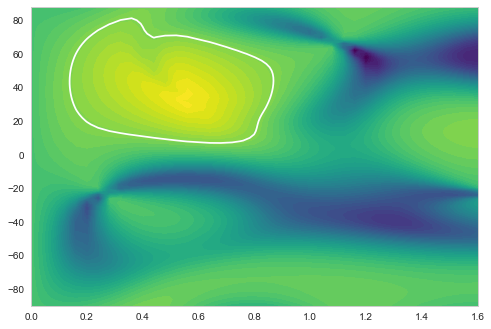

In [147]:
plt.contourf(a.lags,a.degs,t,52,cmap='viridis_r')
c95 = val_at_alpha(t,0.05)
# c90 = val_at_alpha(tnorm,0.10)
# c66 = val_at_alpha(tnorm,0.34)
plt.contour(a.lags,a.degs,t,levels=[c95])

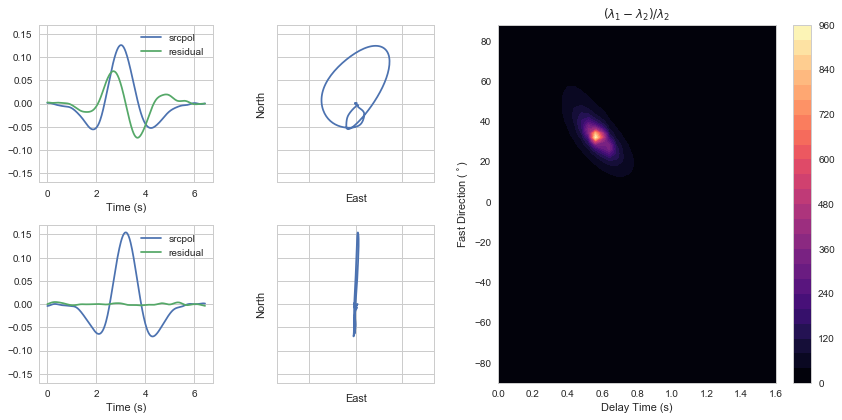

In [145]:
a.plot()

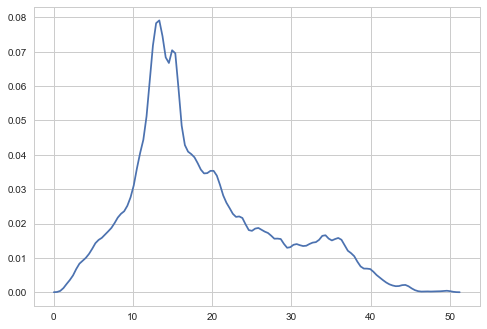

In [146]:
import seaborn as sns
sns.kdeplot(t.ravel(), bw=0.5)

Confidence intervals

In [53]:
from scipy import stats

kde = stats.gaussian_kde(tnorm.ravel())

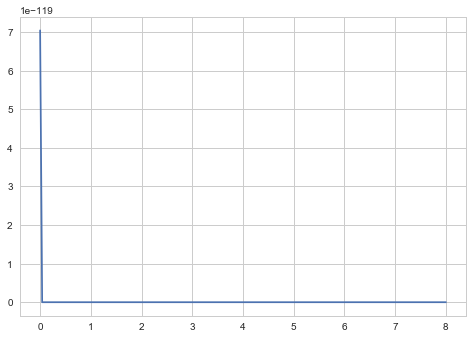

In [66]:
xs = np.linspace(0,8,200)
kde.covariance_factor = lambda : .01
kde._compute_covariance()
plt.plot(xs,kde(xs))
plt.show()



In [68]:
kde.covariance_factor()

0.01

In [78]:
from scipy.interpolate import interp1d

def val_at_alpha(data,alpha):
    """
    Find value of function at the alpha level
    """
    data = data.ravel()
    idx = np.argsort(data)
    cum = np.cumsum(data[idx])
    tot = np.max(cum)
    get_x_at_cum = interp1d(cum, np.arange(cum.size))
    get_val_at_x = interp1d(np.arange(data.size), data[idx])
    xval = get_x_at_cum(tot*alpha)
    return get_val_at_x(xval)

In [75]:
data = tnorm.ravel()
idx = np.argsort(data)
cum = np.cumsum(data[idx])
# tot = np.max(cum)
# get_x_at_cum = interp1d(cum, np.arange(cum.size))
# get_val_at_x = interp1d(np.arange(data.size), data[idx])
# xval = get_x_at_cum(tot*alpha)

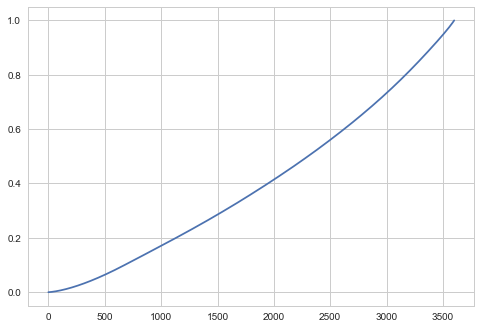

In [77]:
plt.plot(cum)

In [102]:
t

array([[ 2.08132528,  2.08132528,  2.08132528, ...,  2.08132528,
         2.08132528,  2.08132528],
       [ 2.03896998,  2.03911338,  2.03940583, ...,  2.03983591,
         2.03929002,  2.03901516],
       [ 2.06196442,  2.06748454,  2.07270646, ...,  2.0455288 ,
         2.05077514,  2.05632707],
       ..., 
       [ 2.80262704,  2.85007369,  2.89253144, ...,  2.59843   ,
         2.67836385,  2.74622606],
       [ 2.88933866,  2.93848099,  2.98403154, ...,  2.68253604,
         2.7635833 ,  2.83209836],
       [ 2.98652237,  3.03994479,  3.09115037, ...,  2.77319819,
         2.85570326,  2.92626151]])

In [103]:
c95 = val_at_alpha(t,0.05)

In [118]:
t

array([[ 0.15987893,  0.15987893,  0.15987893, ...,  0.15987893,
         0.15987893,  0.15987893],
       [ 0.24215823,  0.24334141,  0.24410277, ...,  0.2361032 ,
         0.23853413,  0.24055455],
       [ 0.32554033,  0.32734177,  0.32825892, ...,  0.31483181,
         0.31927913,  0.32285171],
       ..., 
       [-0.08270123, -0.16723524, -0.27934266, ...,  0.05407714,
         0.02286323, -0.0212602 ],
       [-0.11332966, -0.20588667, -0.32884208, ...,  0.03931502,
         0.00368347, -0.04561065],
       [-0.14341732, -0.24273509, -0.37528631, ...,  0.02290896,
        -0.01668233, -0.07042754]])